In [39]:
#Dependencies
import requests
import pandas as pd
import numpy as np
import gmaps
import json
import os
import gmplot

#Google developer API key
from bobkey import gkey

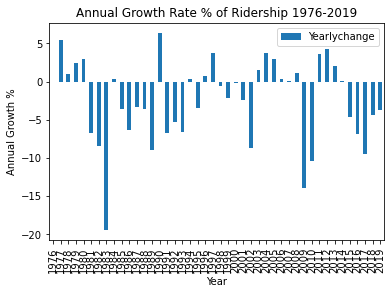

In [40]:
#Bring in official RTA list of Universities it has bus routes for
rta_hist = "Resources/rtahistory.csv"
rtatrend_df = pd.read_csv(rta_hist)
rtatrend_df.dtypes
# Read our file data into pandas
rtatrend_df.plot(kind='bar',x='Year',y='Yearlychange')
plt.ylabel('Annual Growth %')
plt.title("Annual Growth Rate % of Ridership 1976-2019")
plt.show()

In [41]:
#Get target Coordinates for Greater Cuyahoga County
target_coordinates = "41.4339, -81.6758"
target_type = "university"
target_radius = 40000
#Set up a parameters dictionary
params = {
    "location": target_coordinates,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

In [42]:
#Set lists for dataframe, getting lat long for Heatmap
x = response.json()
y = x['results']
for i in range(len(y)):
    googschool_df = pd.DataFrame.from_dict(y)
    googschool_df = googschool_df.drop(googschool_df.columns[[0,2,4,6,7,8,9,10,11,12,13]], axis=1)
    googschool_df = googschool_df[['geometry','place_id','name']].astype(str)
    googschool_df

In [43]:
#testing split geometry column
test_df = googschool_df["geometry"].str.split(", ", n = 1, expand = True)
googschool_df["Lat"]= test_df[0]
googschool_df["Lng"]= test_df[1]
googschool_df.drop(columns =["geometry"], inplace = True)
googschool_df['Lat'] = googschool_df['Lat'].str.replace("{'location': {'lat':","")
googschool_df['Lng'] = googschool_df['Lng'].str.replace("'lng':","")
googschool_df['Lng'] = googschool_df['Lng'].str.replace("}, 'viewport': {'northeast':","")
googschool_df['Lat'] = googschool_df['Lat'].str[:11]
googschool_df['Lng'] = googschool_df['Lng'].str[:11]
googschool_df['Lat'] = pd.to_numeric(googschool_df['Lat'])
googschool_df['Lng'] = pd.to_numeric(googschool_df['Lng'])
googschool_df
#googschool_df.to_csv('C:/Users/rjp54/googschool.csv', sep='\t', encoding='utf-8')

,place_id,name,Lat,Lng
0,ChIJNx2wAJ39MIgRYm0xK9Z8ceA,John Carroll University,41.490507,-81.529312
1,ChIJ3wO-NLMCMYgRdHtEVvm7Vy4,Cuyahoga Community College,41.445793,-81.501518
2,ChIJ0w_1Oj_rMIgRNAqch3T9QEw,Baldwin Wallace University,41.371116,-81.847808
3,ChIJcfiNS0LpMIgR9q6AAXGXQ3A,Cuyahoga Community College Western Campus,41.368702,-81.764487
4,ChIJ4YtfzWP6MIgRbq3SEWa5qQs,Cleveland State University,41.502507,-81.674626
5,ChIJYT0-objlMIgRXFEI4ACUUH0,Hondros College of Nursing,41.398051,-81.654290
6,ChIJVVVVxY36MIgRrKUlHKhmr7k,Csu Career Services Center,41.502241,-81.675336
7,ChIJYT0-objlMIgRcBtJh7QPRxE,Hondros College,41.398951,-81.662667
8,ChIJv6fGsoX7MIgRBY1FjxzAGdw,Early College At John Hay,41.501958,-81.611725
9,ChIJIba4JbIDMYgRrWABRl4mwpM,Ursuline College,41.493833,-81.465027


***NEED to Re-create Tana original RTA route map to layer on Google Universities, RTA published school routes, and Cuyahoga County High School list***

In [44]:
# The path to our bus stop locations CSV file
locations_file = "Resources/stops.csv"

# Read our file data into pandas
locations_df = pd.read_csv(locations_file)
locations_df.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN
1,2.0,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418571,-81.760947,NaN,NaN,0,NaN
2,4.0,NaN,EUCLID AV & E 100TH ST,NaN,41.503697,-81.618108,NaN,NaN,0,NaN
3,5.0,NaN,10081 W RIDGEWOOD DR,NaN,41.384506,-81.756317,NaN,NaN,0,NaN
4,14.0,NaN,PROSPECT AV & ONTARIO ST,NaN,41.498030,-81.692012,NaN,NaN,0,NaN


In [45]:
# The path to our bus stop times CSV file
stops_file = "Resources/stop_times.csv"

# Read our file data into pandas
stops_df = pd.read_csv(stops_file)
stops_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,16741667,3:21:00 AM,3:21:00 AM,14507,1,0,0
1,16741667,3:22:00 AM,3:22:00 AM,4568,2,0,0
2,16741667,3:23:00 AM,3:23:00 AM,4522,3,0,0
3,16741667,3:24:00 AM,3:24:00 AM,4378,4,0,0
4,16741667,3:25:00 AM,3:25:00 AM,4556,5,0,0


In [46]:
# merge
bus_data = pd.merge(locations_df, stops_df, on=["stop_id", "stop_id"])
bus_data.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,trip_id,arrival_time,departure_time,stop_sequence,pickup_type,drop_off_type
0,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741990,5:54:00 AM,5:54:00 AM,82,0,0
1,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741993,6:54:00 AM,6:54:00 AM,82,0,0
2,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741995,7:25:00 AM,7:25:00 AM,82,0,0
3,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741997,7:57:00 AM,7:57:00 AM,82,0,0
4,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741999,8:28:00 AM,8:28:00 AM,82,0,0


In [47]:
#groupby stop id to see how many stops 
numberstops = bus_data.groupby(['stop_id', 'stop_lat', 'stop_lon'])['arrival_time'].nunique()
numberstops

stop_id  stop_lat   stop_lon  
1.0      41.392985  -81.536518     63
2.0      41.418571  -81.760947     72
4.0      41.503697  -81.618108    241
5.0      41.384506  -81.756317    108
14.0     41.498030  -81.692012    370
                                 ... 
50001.0  41.500290  -81.691917    492
60001.0  41.500764  -81.682781    172
60002.0  41.500256  -81.686436    166
60003.0  41.499918  -81.688906    166
60004.0  41.499515  -81.691994    161
Name: arrival_time, Length: 5799, dtype: int64

In [48]:
# Store lat and long
locations = locations_df[['stop_lat','stop_lon']]

In [50]:
# Plot Heatmap
fig_heat = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, dissipating=False, max_intensity=2, point_radius=.0025)
fig_heat.add_layer(heat_layer)
fig_heat

Figure(layout=FigureLayout(height='420px'))

In [51]:
#Putting listed schools over original heatmap
googschool_tuples=[]
for index, row in googschool_df.iterrows():
    googschool_tuples.append( tuple([row["Lat"],row["Lng"]] ))
#Set the Tuple list to be the layer
markers=gmaps.marker_layer(googschool_tuples)
fig_heat.add_layer(markers)
#Print revised Heatmap with Hotel markers
fig_heat

Figure(layout=FigureLayout(height='420px'))

MAP #1 RTA bus routes to Google Search of Univerities
From the original bus route (heat map), we overlayed the locations of a Google geomaps search, "universities" within a 40km radius.  As you can see, the universities queried in the Google search are fairly well covered by current RTA bus routes.  Non-coverage includes Ursuline College and Lorain Community College (which is with 40km).

In [52]:
#Bring in official RTA list of Universities it has bus routes for
rta_univ = "Resources/rta_universities.csv"
rta_univ_df = pd.read_csv(rta_univ)
rta_univ_df

,Name,Enrollment,Number_Routes,Lat,Lng
0,Baldwin Wallace College,3532,1,41.371116,-81.847808
1,Bryant & Stratton: West,308,2,41.404453,-81.783910
2,Bryant & Stratton: Main,475,11,41.503000,-81.668322
3,Case Western Reserve University,5131,5,41.504341,-81.608383
4,Chancellor University,0,1,41.402678,-81.666043
5,Cleveland Institute of Art,658,2,41.510495,-81.602463
6,Cleveland State University,11784,12,41.502507,-81.674626
7,Cleveland State University: West Center,500,2,41.469420,-81.912482
8,Cleveland State University: Corporate College ...,500,2,41.438804,-81.502259
9,CCC: Hospitality Management Center,1000,31,41.499184,-81.694267


In [54]:
#Putting listed RTA schools over original heatmap
#Need to specially marker the (4) schools that are closed and the (2) High Schools.

rtaschool_tuples=[]
for index, row in rta_univ_df.iterrows():
    rtaschool_tuples.append( tuple([row["Lat"],row["Lng"]] ))
#Set the Tuple list to be the layer
markers=gmaps.marker_layer(rtaschool_tuples)
fig_heat.add_layer(markers)
#Print revised Heatmap with Hotel markers
fig_heat

Figure(layout=FigureLayout(height='420px'))

MAP #2 RTA bus routes to official 
From the original bus route (heat map), we overlayed the locations of all Universities (Universities, Community Colleges, Trade Schools) that have designated RTA routes.  Similar to the Google search, bus route coverage to the schools is fairly adequate, with outliers being Ursuline College and Lorain Community College.  However, there are (4) listed schools which no longer exist: Chancellor University, Indiana Wesleyan University (East), Remington College (West), and South University.

In [61]:
#Closed Schools with dedicated RTA bus routes
closed_schools = [
    {'name': 'Chancellor University', 'location': (41.402677, -81.666043), 'routes': 1},
    {'name': 'Indiana Wesleyan University: East', 'location': (41.398951, -81.662667), 'routes': 1},
    {'name': 'Remington College: West', 'location': (41.418281, -81.9159335), 'routes': 1},
    {'name': 'Maple Heights High School', 'location': (41.4313992, -81.4991614), 'routes': 1},
    {'name': 'South University', 'location': (41.4123811, -81.565495), 'routes': 1},
    {'name': 'North Olmsted High School', 'location': (41.4112593, -81.9262769), 'routes': 1},
]

school_locations =[school['location'] for school in closed_schools]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Number Routes</dt><dd>{routes}</dd>
</dl>
"""
school_info = [info_box_template.format(**school) for school in closed_schools]
marker_layer = gmaps.marker_layer(school_locations, info_box_content=school_info)
fig_heat = gmaps.figure()
#markers=gmaps.marker_layer(rtaschool_tuples)
fig_heat.add_layer(marker_layer)
#Print revised Heatmap with Hotel markers
fig_heat


Figure(layout=FigureLayout(height='420px'))

In [24]:
#Correlation Comparing Enrollment and # of Bus Routes
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
enrollcorr = rta_univ_df.iloc[:,1]
routecorr = rta_univ_df.iloc[:,2]
correlation = st.pearsonr(enrollcorr, routecorr)
print(f"The correlation between University Enrollment and # of published RTA routes is {round(correlation[0],4)}")

The correlation between University Enrollment and # of published RTA routes is 0.1279


The r-squared is: 0.01636772486879243


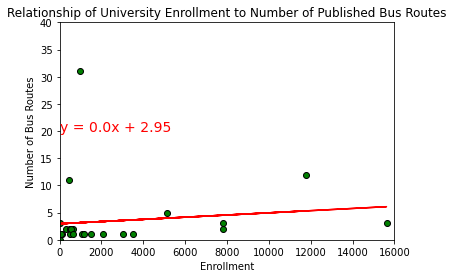

In [25]:
#ScatterPlot Graph Comparing Enrollment and # of Bus Routes
scatterx = enrollcorr
scattery = routecorr
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatterx, scattery)
regress_values = scatterx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(scatterx,scattery,facecolors="green", edgecolors="black")
plt.plot(scatterx, regress_values, "r-")
plt.annotate(line_eq,(10,20),fontsize=14,color="red")
plt.xlabel('Enrollment')
plt.ylabel('Number of Bus Routes')
plt.xlim(0,16000)
plt.ylim(0,40)
plt.title('Relationship of University Enrollment to Number of Published Bus Routes')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [26]:
#Bring in official RTA list of Universities it has bus routes for
highschool = "Resources/highschools.csv"
highschool_df = pd.read_csv(highschool)
highschool_df

,Name,Enrollment,Lat,Lng
0,Whitney M Young School,62,41.448735,-81.554997
1,New Technology HS@East Tech,125,41.492237,-81.653261
2,Garrett Morgan Schl Of Science School,225,41.492235,-81.668582
3,Jane Addams Business Careers High School,214,41.494920,-81.668160
4,Thomas Jefferson School,189,41.467942,-81.720211
...,...,...,...,...
61,Mayfield High School,1749,41.536544,-81.461672
62,Strongsville High School,1928,41.303367,-81.848192
63,Berea-Midpark High School,1883,41.372929,-81.847424
64,John Adams College & Career Academy,346,41.454412,-81.603811


In [29]:
#Putting listed RTA schools over original heatmap
highschool_tuples=[]
for index, row in highschool_df.iterrows():
    highschool_tuples.append( tuple([row["Lat"],row["Lng"]] ))
#Set the Tuple list to be the layer
markers=gmaps.marker_layer(highschool_tuples)
fig_heat.add_layer(markers)
#Print revised Heatmap with Hotel markers
fig_heat

Figure(layout=FigureLayout(height='420px'))

MAP #3 Comparing Bus Routes to Cuyahoga County High Schools
From the original bus route (heat map), we overlayed a list of all High Schools in Cuyahoga County (source Ohio Dept of Education, http://education.ohio.gov/Topics/Data/Frequently-Requested-Data/Enrollment-Data.  It appears there is fairly consistent bus route coverage, but also some gaps.  Gaps typically occur in the suburban area.  However, many of these schools also have the largest enrollment numbers.

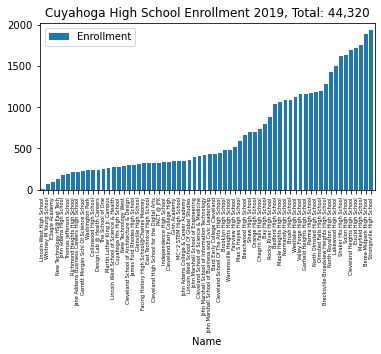

In [110]:
#Make bar chart to show Enrollment in Cuyahoga County
school_bar = highschool_df.sort_values(by=['Enrollment'])
school_bar
school_bar.plot(kind='bar',x='Name',y='Enrollment', width=0.75)
plt.rc('xtick', labelsize=5)
plt.subplots_adjust(bottom= 0.4, top = 0.98)
plt.title("Cuyahoga High School Enrollment 2019, Total: 44,320")
plt.show()